In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ports.csv")
df

,geo_name,date_year,date_month,vessel_type,total,UA,RU,longitude,latitude,iso2
0,ADLER (RU),2021,11,Cargo,1,1,1,39.933333,43.433333,RU
1,AIN SUKHNA TERMINAL (EG),2021,8,Tanker,21,0,2,32.366667,29.583333,EG
2,AIN SUKHNA TERMINAL (EG),2021,8,Cargo,4,0,0,32.366667,29.583333,EG
3,AIN SUKHNA TERMINAL (EG),2021,9,Tanker,16,0,1,32.366667,29.583333,EG
4,AIN SUKHNA TERMINAL (EG),2021,9,Cargo,5,0,1,32.366667,29.583333,EG
...,...,...,...,...,...,...,...,...,...,...
1803,ZEIT BAY TERMINAL (EG),2022,3,Cargo,1,1,0,33.600000,27.833333,EG
1804,ZEIT BAY TERMINAL (EG),2022,7,Cargo,2,0,0,33.600000,27.833333,EG
1805,ZEIT BAY TERMINAL (EG),2022,9,Cargo,2,0,0,33.600000,27.833333,EG
1806,ZEIT BAY TERMINAL (EG),2022,9,Tanker,1,0,0,33.600000,27.833333,EG


In [5]:
df["date"] = pd.to_datetime(df['date_year'].astype(str) + "-" + df['date_month'].astype(str), format='%Y-%m')
df

,geo_name,date_year,date_month,vessel_type,total,UA,RU,longitude,latitude,iso2,date
0,ADLER (RU),2021,11,Cargo,1,1,1,39.933333,43.433333,RU,2021-11-01
1,AIN SUKHNA TERMINAL (EG),2021,8,Tanker,21,0,2,32.366667,29.583333,EG,2021-08-01
2,AIN SUKHNA TERMINAL (EG),2021,8,Cargo,4,0,0,32.366667,29.583333,EG,2021-08-01
3,AIN SUKHNA TERMINAL (EG),2021,9,Tanker,16,0,1,32.366667,29.583333,EG,2021-09-01
4,AIN SUKHNA TERMINAL (EG),2021,9,Cargo,5,0,1,32.366667,29.583333,EG,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...
1803,ZEIT BAY TERMINAL (EG),2022,3,Cargo,1,1,0,33.600000,27.833333,EG,2022-03-01
1804,ZEIT BAY TERMINAL (EG),2022,7,Cargo,2,0,0,33.600000,27.833333,EG,2022-07-01
1805,ZEIT BAY TERMINAL (EG),2022,9,Cargo,2,0,0,33.600000,27.833333,EG,2022-09-01
1806,ZEIT BAY TERMINAL (EG),2022,9,Tanker,1,0,0,33.600000,27.833333,EG,2022-09-01


In [33]:
sub_df = df[["vessel_type", "total", "UA", "RU", "iso2", "date"]].copy()
sub_df = sub_df[sub_df["date"] > pd.to_datetime("2021-08-01")]
sub_df

,vessel_type,total,UA,RU,iso2,date
0,Cargo,1,1,1,RU,2021-11-01
3,Tanker,16,0,1,EG,2021-09-01
4,Cargo,5,0,1,EG,2021-09-01
5,Cargo,10,0,1,EG,2021-10-01
6,Tanker,16,0,1,EG,2021-10-01
...,...,...,...,...,...,...
1803,Cargo,1,1,0,EG,2022-03-01
1804,Cargo,2,0,0,EG,2022-07-01
1805,Cargo,2,0,0,EG,2022-09-01
1806,Tanker,1,0,0,EG,2022-09-01


In [34]:
agg_df = sub_df.groupby(["vessel_type", "iso2", "date"]).sum().reset_index(["iso2", "vessel_type"])
agg_df

,vessel_type,iso2,total,UA,RU
date,,,,,
2021-09-01,Cargo,DJ,81,9,2
2021-10-01,Cargo,DJ,90,7,1
2021-11-01,Cargo,DJ,91,8,4
2021-12-01,Cargo,DJ,92,9,4
2022-01-01,Cargo,DJ,90,6,2
...,...,...,...,...,...
2022-06-01,Tanker,UA,87,87,8
2022-07-01,Tanker,UA,122,122,8
2022-08-01,Tanker,UA,155,155,14


In [35]:
agg_df["iso2"].unique()

array(['DJ', 'EG', 'KE', 'MZ', 'RU', 'SD', 'TZ', 'UA'], dtype=object)

<AxesSubplot: xlabel='date'>

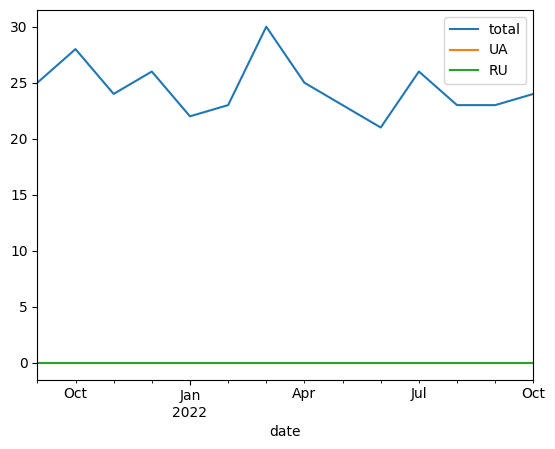

In [36]:
agg_df[(agg_df["vessel_type"] == "Tanker") & (agg_df["iso2"] == "KE")].plot()

<AxesSubplot: xlabel='date'>

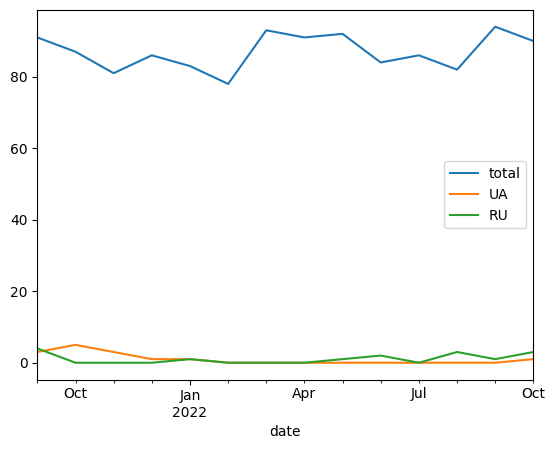

In [37]:
agg_df[(agg_df["vessel_type"] == "Cargo") & (agg_df["iso2"] == "KE")].plot()

<AxesSubplot: xlabel='date'>

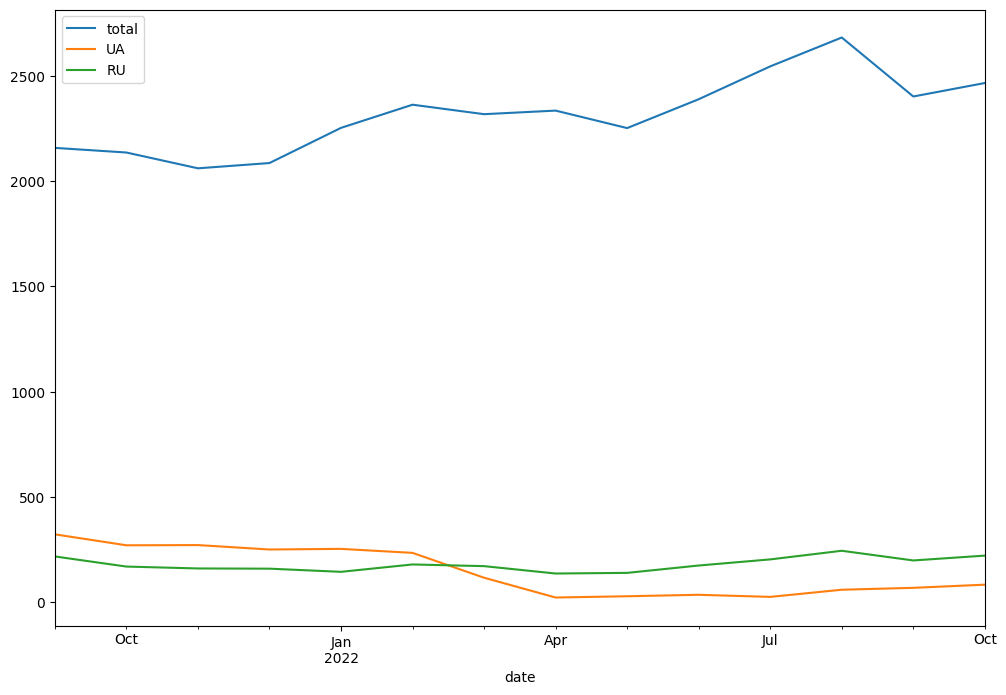

In [38]:
agg_df[(agg_df["vessel_type"] == "Cargo") & (agg_df["iso2"] == "EG")].plot(figsize=(12, 8))

In [49]:
iso2map = {
    "EG": "Egypt",
    "DJ": "Djibouti",
    "KE": "Kenya",
    "MZ": "Mozambique",
    "TZ": "Tanzania",
    "SD": "Sudan",
}

vtypemap = {
    False: "Tanker",
    True: "Cargo",
}

def doplot(is_cargo, iso2):
    agg_df[(agg_df["vessel_type"] == vtypemap[is_cargo]) & (agg_df["iso2"] == iso2)][["UA", "RU"]].plot(figsize=(12, 8), title=f"{iso2map[iso2]} ({vtypemap[is_cargo]})")

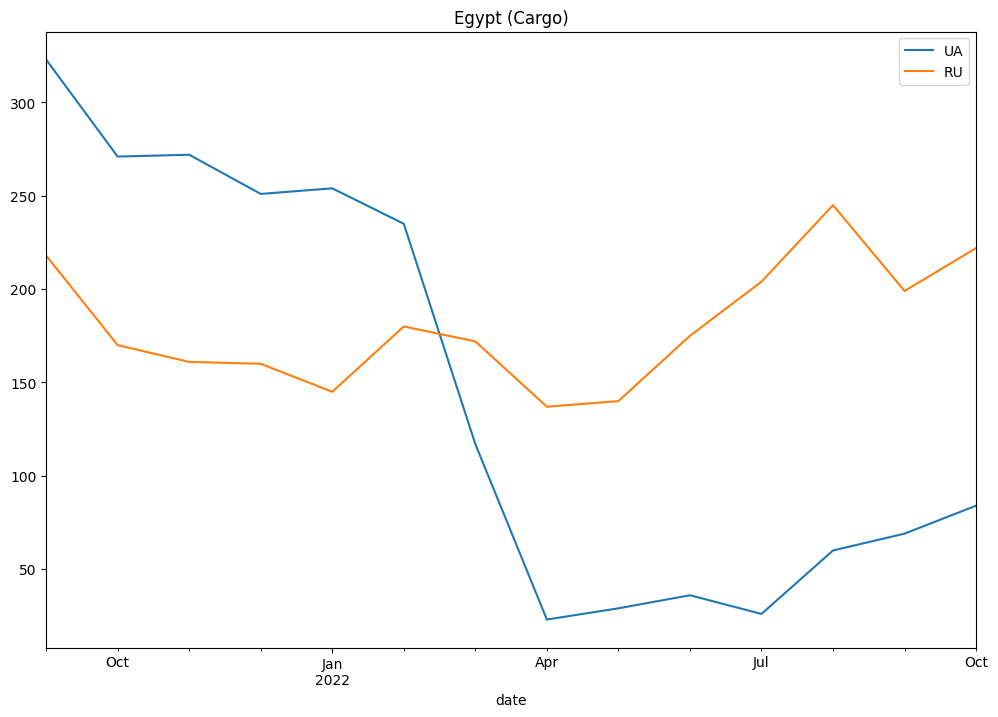

In [50]:
doplot(True, "EG")

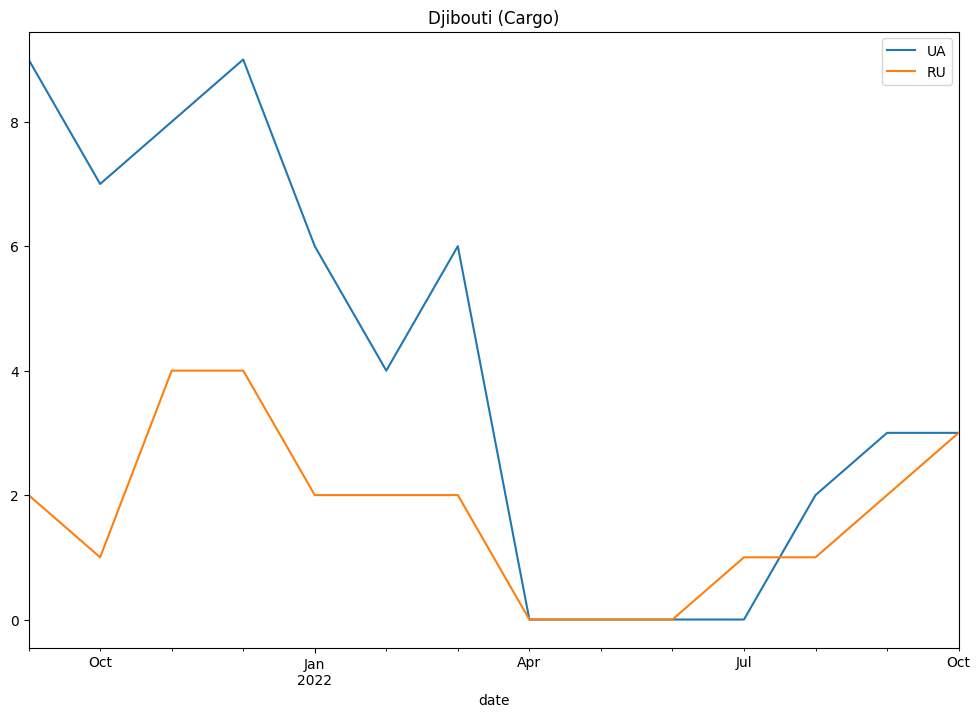

In [51]:
doplot(True, "DJ")

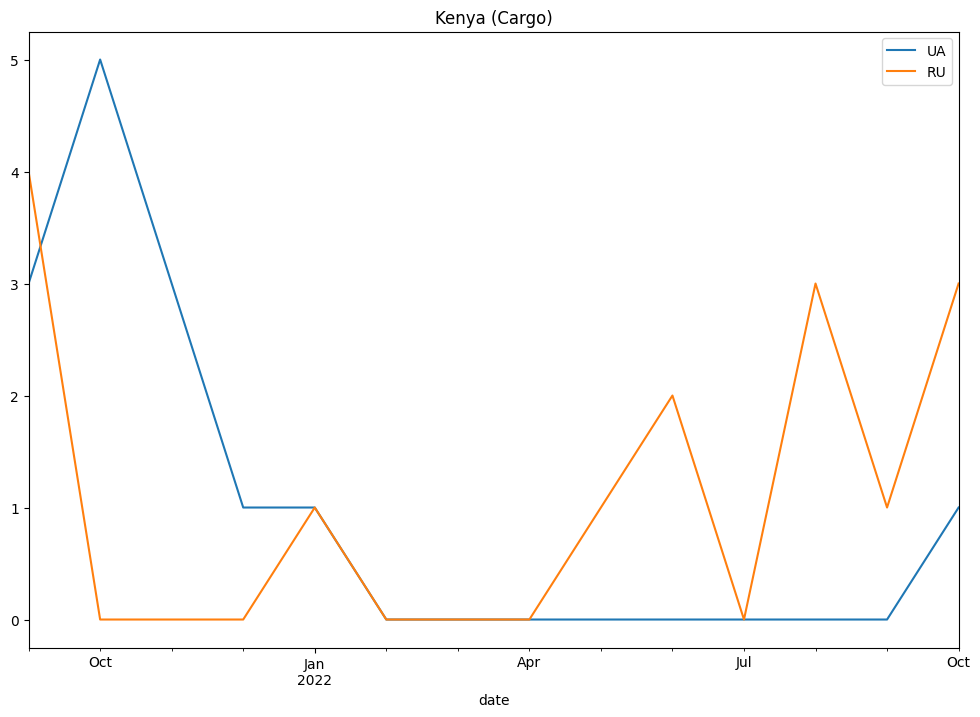

In [53]:
doplot(True, "KE")

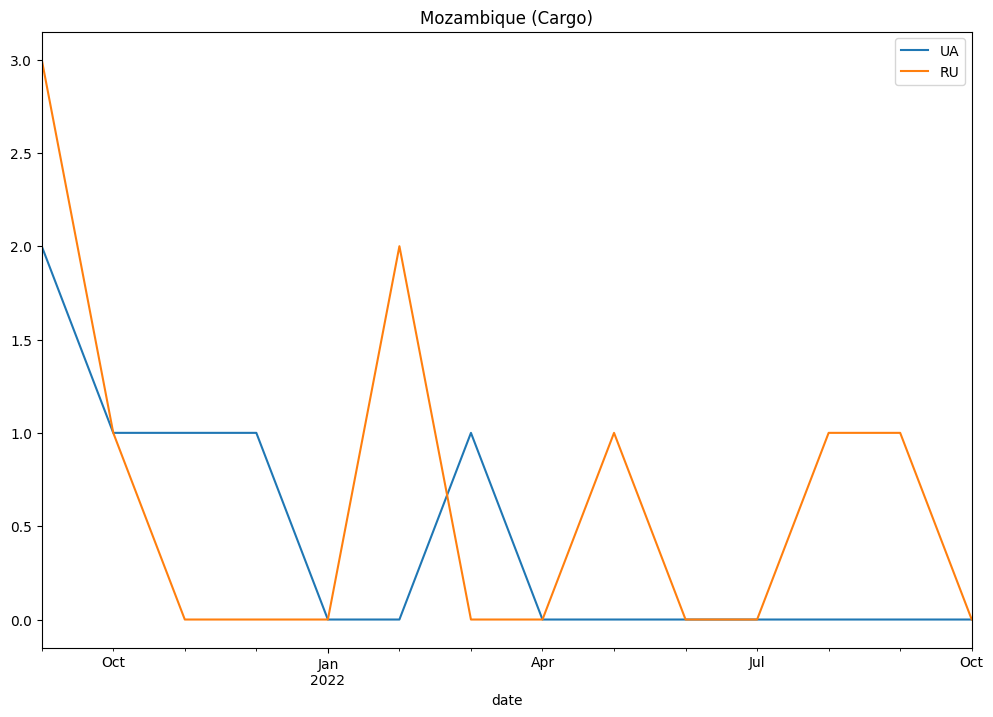

In [52]:
doplot(True, "MZ")

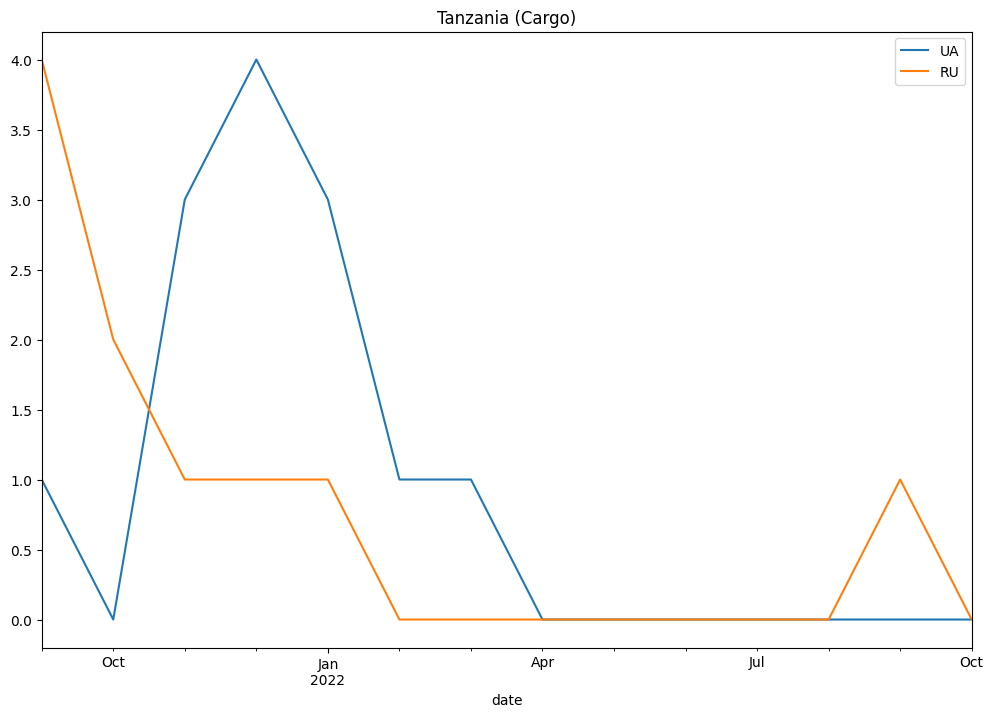

In [54]:
doplot(True, "TZ")

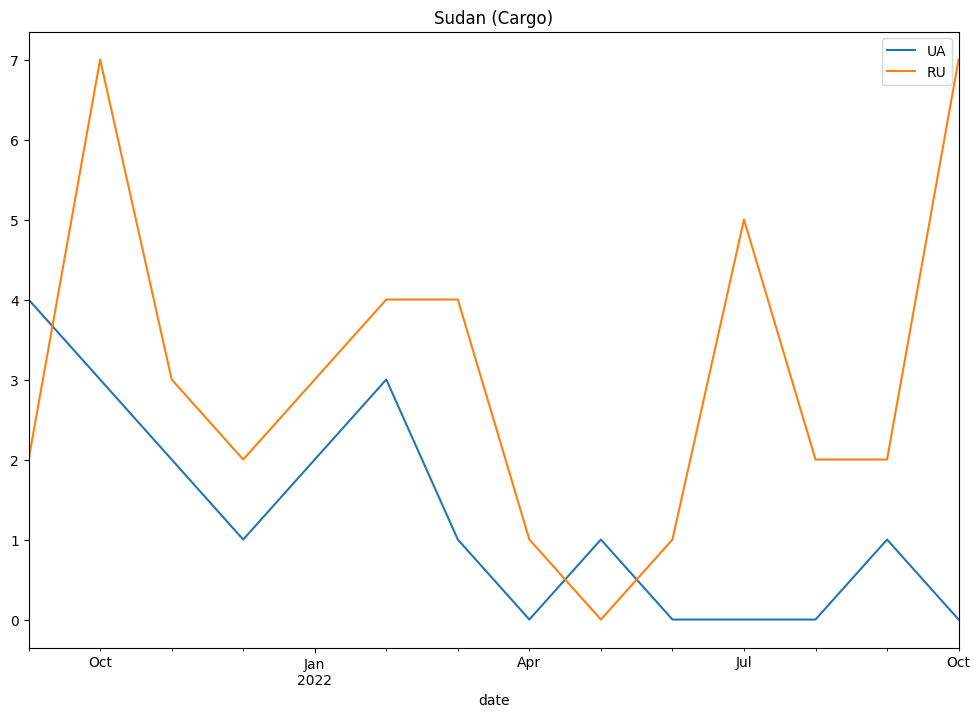

In [55]:
doplot(True, "SD")

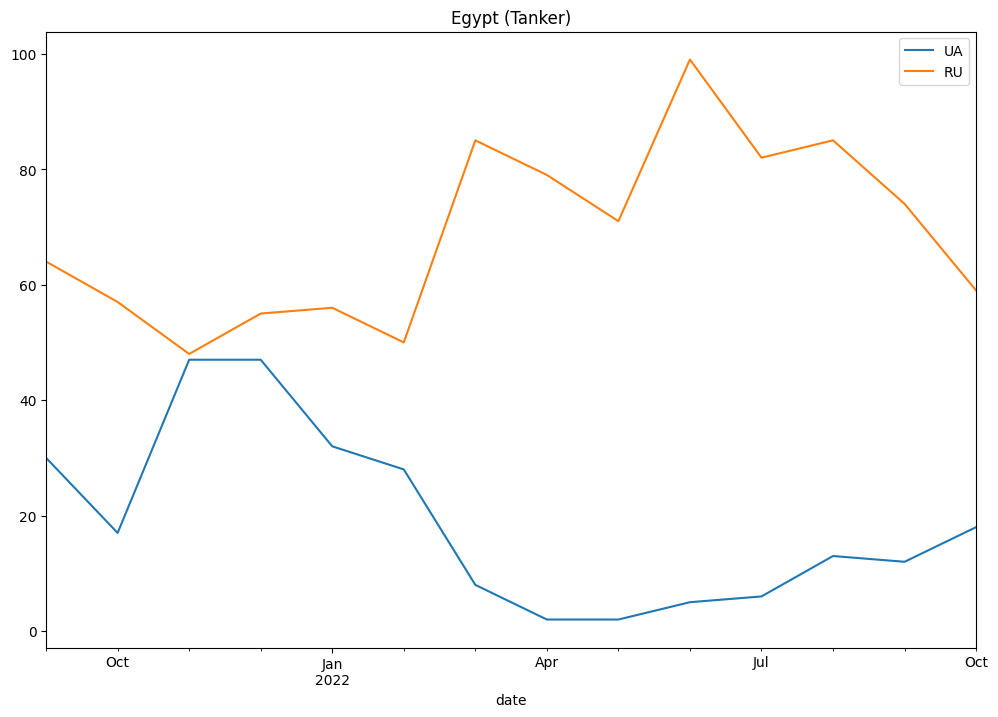

In [56]:
doplot(False, "EG")

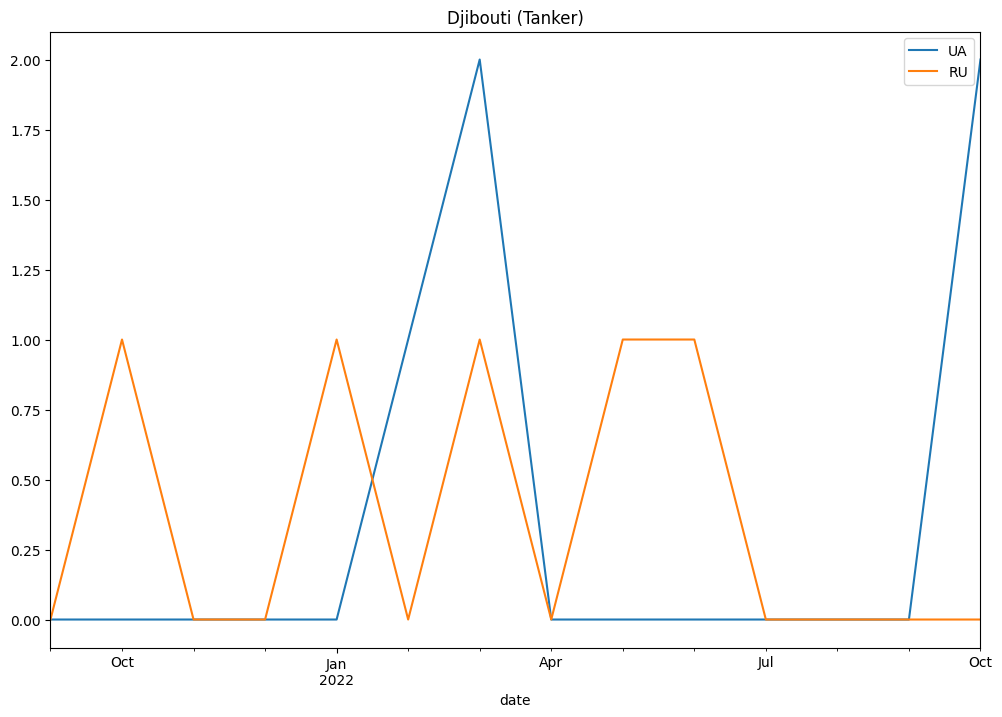

In [57]:
doplot(False, "DJ")

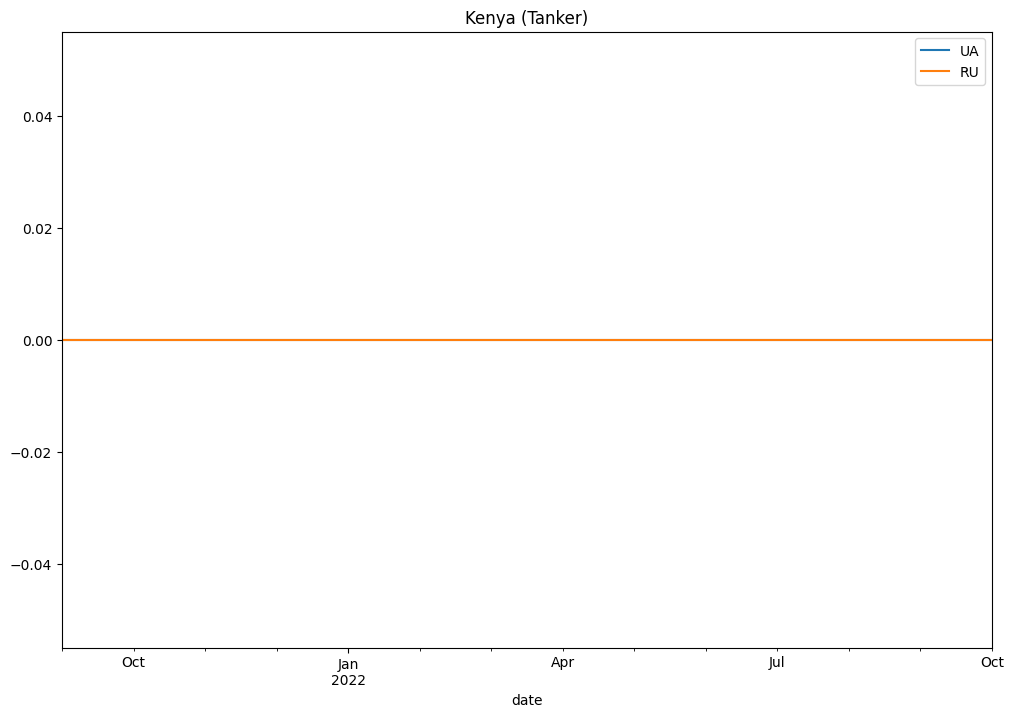

In [58]:
doplot(False, "KE")

In [70]:
totals = agg_df[["vessel_type", "iso2", "total"]].reset_index().pivot_table(index=["date"], columns=["iso2", "vessel_type"], values=["total"], aggfunc="sum")
totals

total                                                             \
iso2           DJ           EG           KE           MZ           RU          
vessel_type Cargo Tanker Cargo Tanker Cargo Tanker Cargo Tanker Cargo Tanker   
date                                                                           
2021-09-01     81     26  2158    857    91     25   158     35  1494    604   
2021-10-01     90     24  2136    777    87     28   160     44  1454    655   
2021-11-01     91     31  2061    814    81     24   148     50  1181    575   
2021-12-01     92     26  2086    818    86     26   150     52   979    492   
2022-01-01     90     31  2253    743    83     22   138     53   928    449   
2022-02-01     96     23  2363    702    78     23   140     47   936    473   
2022-03-01    108     26  2318    838    93     30   154     46   637    368   
2022-04-01     96     33  2335    969    91     25   137     55   820    390   
2022-05-01     96     30  2252    973    92     23   169     46   954    496   
2022-06-01     89     35  2389   1118    84     21   146     49   967    509   
2022-07-01    100     40  2545   1147    86     26   185     42  1197    521   
2022-08-01     96     31  2682   1119    82     23   175     55  1237    545   
2022-09-01     94     32  2402   1161    94     23   172     52  1039    481   
2022-10-01     86     30  2466   1090    90     24   201     63  1193    533   

                                                    
iso2           SD           TZ           UA         
vessel_type Cargo Tanker Cargo Tanker Cargo Tanker  
date                                                
2021-09-01     66     25    75     28  1004    152  
2021-10-01     58     13    83     32  1067    177  
2021-11-01     63     18    89     33  1096    167  
2021-12-01     62     18    84     28  1175    180  
2022-01-01     67     16    81     26  1089    152  
2022-02-01     68     17    87     26   974    142  
2022-03-01     81     20    78     27   286     48  
2022-04-01     87     18    86     30   338     49  
2022-05-01     87     19    87     36   409     72  
2022-06-01     88     15    86     29   391     87  
2022-07-01     69     18    84     28   467    122  
2022-08-01     61     16    86     34   635    155  
2022-09-01     54     16    89     34   749    164  
2022-10-01     61     19    86     37   853    176

<AxesSubplot: title={'center': 'totals'}, xlabel='date'>

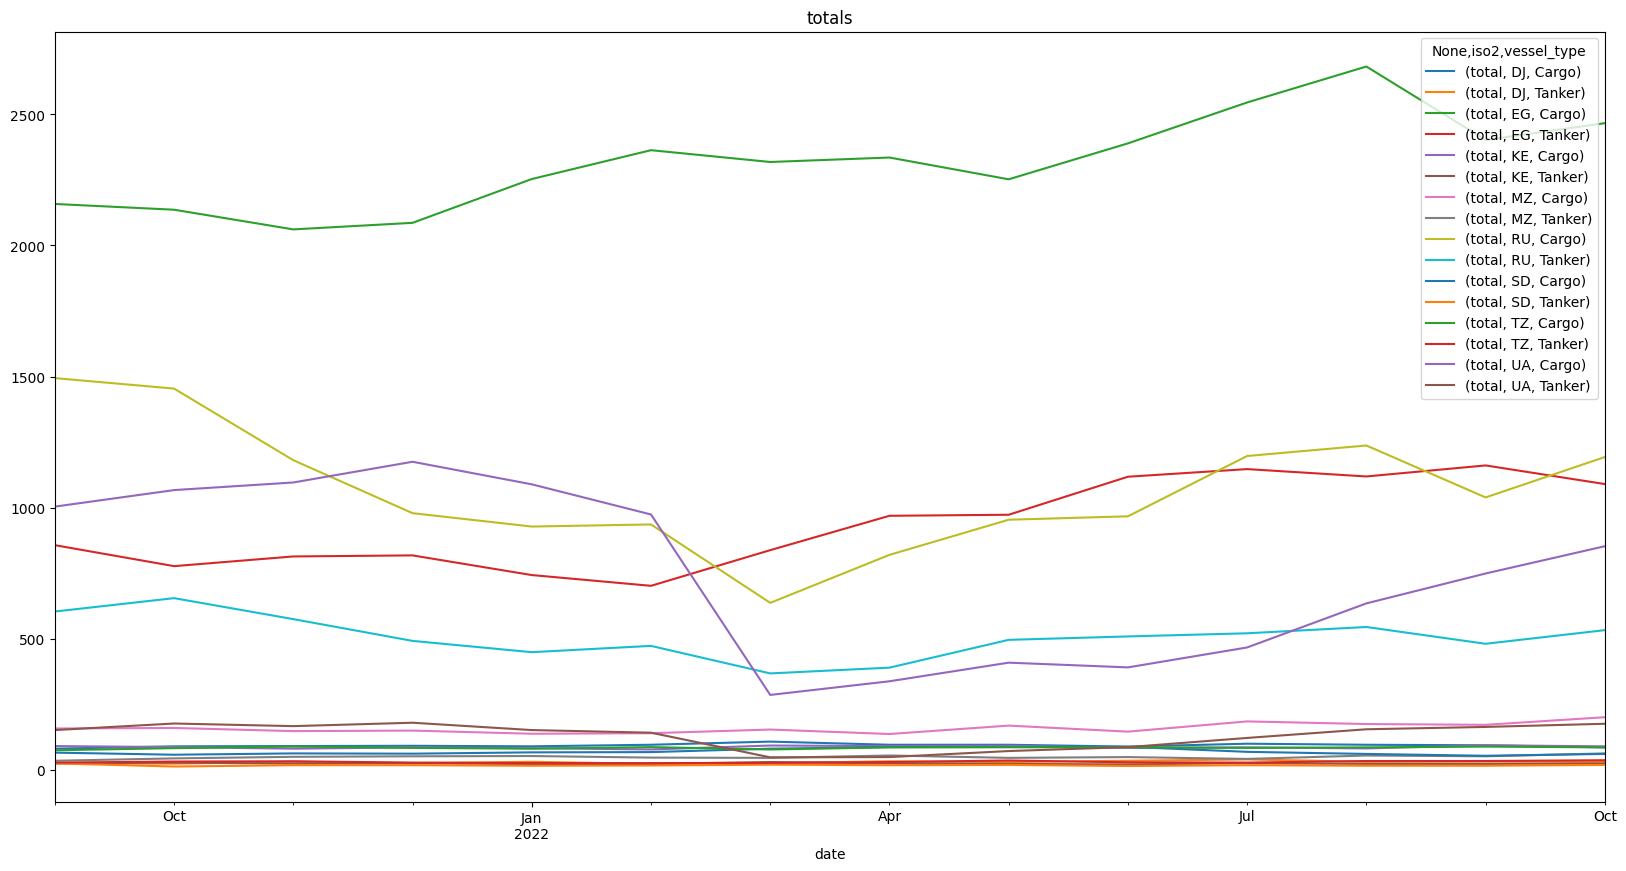

In [71]:
totals.plot(figsize=(20, 10), title="totals")